## Importação dos pacotes

In [1]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [2]:
# definir parâmetros extras
pd.set_option('precision', 4)
pd.set_option('display.max_columns', 100)

## Carga dos dados

In [3]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

# mostrar alguns exemplos de registros
data.head()

,temperature
date,
2012-10-01,11.0368
2012-10-02,14.3406
2012-10-03,14.5184
2012-10-04,16.8204
2012-10-05,16.9484


In [4]:
# quantas linhas e colunas existem?
data.shape

(1508, 1)

## Análise dos dados

In [5]:
# quais são as colunas e respectivos tipos de dados?
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2012-10-01 to 2016-11-16
Data columns (total 1 columns):
temperature    1507 non-null float64
dtypes: float64(1)
memory usage: 23.6 KB


In [6]:
# existem colunas com dados nulos?
data[data.columns[data.isnull().any()]].isnull().sum()

temperature    1
dtype: int64

In [7]:
# sumário estatístico das características numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1507.0,12.6856,11.5161,-20.5687,3.9493,13.6658,22.2049,35.7381


In [8]:
# qual o período de datas?
print(min(data.index.values), '=>', max(data.index.values))

2012-10-01T00:00:00.000000000 => 2016-11-16T00:00:00.000000000


In [9]:
10.0 / data.shape[0]

0.006631299734748011

In [16]:
periodo = '2W' # quinzenal
#periodo = '7D' # semanal

minimas = data.resample(periodo).min()
maximas = data.resample(periodo).max()
medias = data.resample(periodo).mean()
desvios = data.resample(periodo).std()

minimas.rename(columns={'temperature': 'minima'}, inplace=True)
maximas.rename(columns={'temperature': 'maxima'}, inplace=True)
medias.rename(columns={'temperature': 'media'}, inplace=True)
desvios.rename(columns={'temperature': 'desvio'}, inplace=True)

In [17]:
medias.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2012-10-07 to 2016-11-27
Freq: 2W-SUN
Data columns (total 1 columns):
media    109 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


In [18]:
temperaturas = minimas.merge(maximas, on='date').merge(medias, on='date').merge(desvios, on='date')

In [19]:
temperaturas['media-dp'] = temperaturas.media - temperaturas.desvio
temperaturas['media+dp'] = temperaturas.media + temperaturas.desvio

In [20]:
temperaturas.head(10).T

date,2012-10-07 00:00:00,2012-10-21 00:00:00,2012-11-04 00:00:00,2012-11-18 00:00:00,2012-12-02 00:00:00,2012-12-16 00:00:00,2012-12-30 00:00:00,2013-01-13 00:00:00,2013-01-27 00:00:00,2013-02-10 00:00:00
minima,6.2947,6.2905,3.6038,-0.7026,-1.3887,-0.3740,-6.2281,-8.1210,-15.1022,-10.4400
maxima,16.9484,17.6471,17.8661,13.1171,10.0603,13.3738,9.8249,9.5403,6.2412,11.2224
media,13.4742,9.6254,8.9880,4.7887,3.7938,4.4132,1.2876,-0.8986,-4.3640,-3.8765
desvio,3.7278,3.5902,5.0112,4.0697,3.2443,4.2639,4.2625,4.5484,5.9046,6.7981
media-dp,9.7464,6.0353,3.9768,0.7190,0.5495,0.1493,-2.9749,-5.4470,-10.2686,-10.6746
media+dp,17.2019,13.2156,13.9992,8.8584,7.0381,8.6770,5.5501,3.6497,1.5406,2.9216


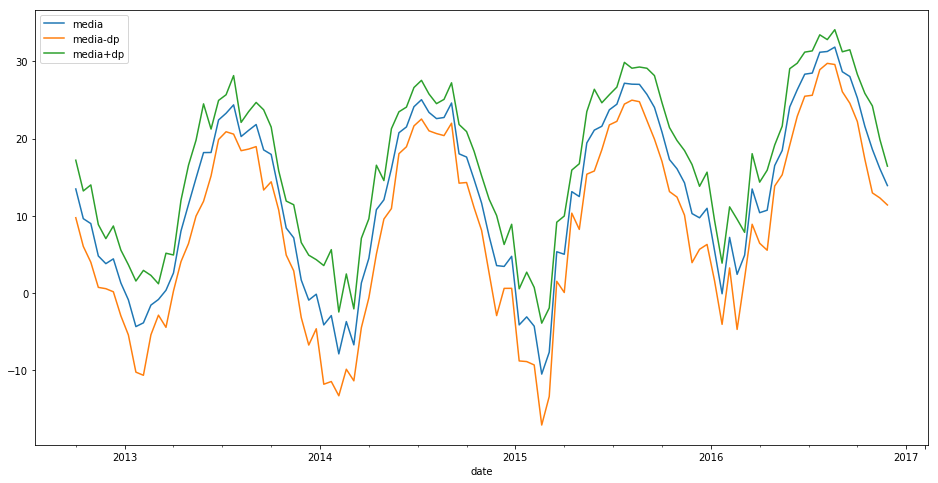

In [22]:
#temperaturas[['media']].plot(figsize=(16,8))
temperaturas[['media', 'media-dp', 'media+dp']].plot(figsize=(16,8))